In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.affinity import scale
import netCDF4
from mpl_toolkits.axes_grid1 import make_axes_locatable

lcc = {'proj': 'lcc', 'lat_1': 30, 'lat_2': 60, 'lat_0': 38, 'lon_0': 126, 'x_0': 0, 'y_0': 0, 'ellps': 'WGS84', 'units': 'm', 'no_defs': True}

In [2]:
gdf = gpd.read_file('ARD_ADMIN_AS', encoding='cp949').to_crs(lcc)
gdf.head()

,FTR_IDN,FTR_CDE,MNG_ARA,MNG_NAM,geometry
0,1,AG0021,6.365659e+07,None,"POLYGON ((-2395385.109 -1799407.389, -2408803...."
1,2,AG0021,1.392173e+08,None,"POLYGON ((-2475009.546 -1795659.564, -2493943...."
2,3,AG0021,1.952751e+06,하이퐁,"POLYGON ((-2000066.289 -1767626.562, -2000443...."
3,4,AG0021,7.926177e+09,None,"POLYGON ((-2149350.154 -1368594.194, -2148859...."
4,5,AG0021,6.206907e+09,까오방,"POLYGON ((-2149783.016 -1376089.892, -2149920...."


In [3]:
ncfile = netCDF4.Dataset('sfc_grid_ta_202308292200.nc', 'r', format='netCDF4')
ncfile

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: SFC GRID FILE
    version: 0
    product_type: SFC_GRID_ta_
    time: [2023    8   29   22    0    0]
    time_in: [2023    8   29   22   30   10]
    map_pro: Lambert Conformal Conic Projection
    map_nx: 2048.0
    map_ny: 2048.0
    map_sx: 880.0
    map_sy: 1540.0
    map_slon: 126.0
    map_slat: 38.0
    grid_size: 0.5
    grid_nx: 2049.0
    grid_ny: 2049.0
    stn_num: 1299.0
    dimensions(sizes): nx(2049), ny(2049)
    variables(dimensions): int16 data(ny, nx)
    groups: 

In [4]:
ta_val = np.array(ncfile.variables['data']) / ncfile.variables['data'].data_scale
ta_val[ta_val < -900] = np.nan
ta_val

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

<AxesSubplot: >

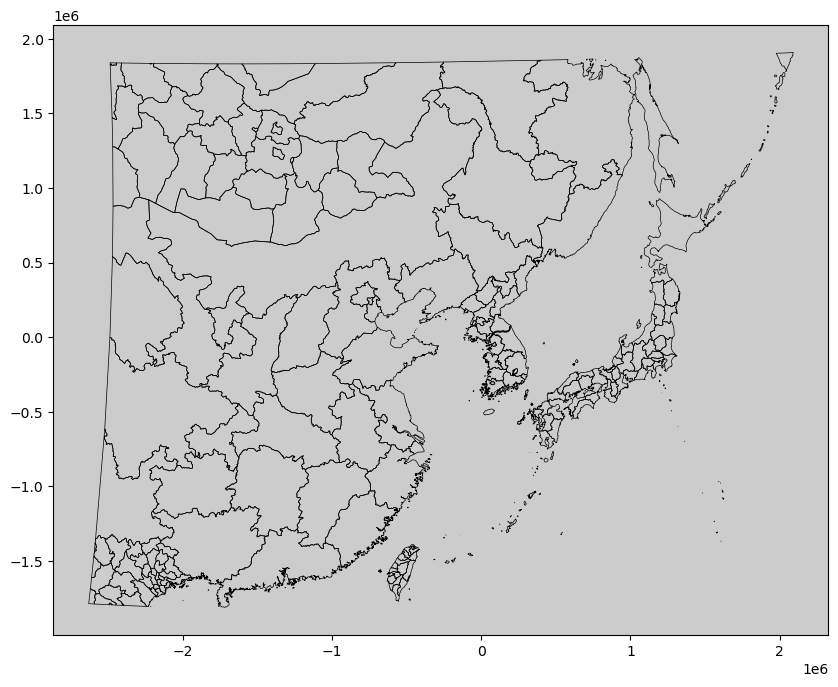

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_facecolor('#cccccc')
gdf.plot(ax=ax, linewidth=0.5, color='none')

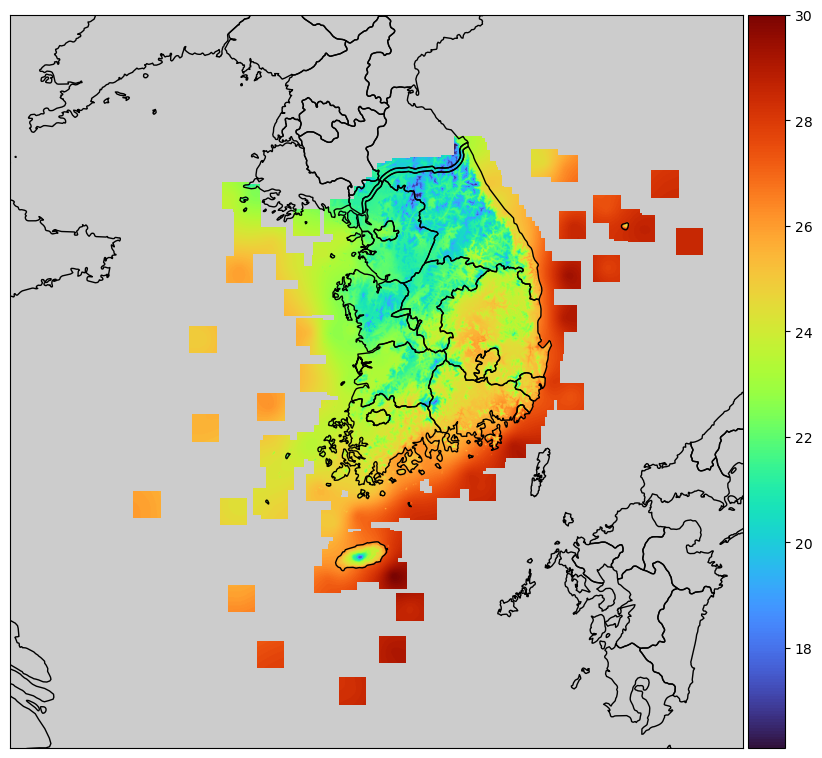

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

ax.set_facecolor('#cccccc')
# rescale 1m map to 500m map
gdf.geometry.apply(lambda geom: scale(geom, xfact=0.002, yfact=0.002, origin=(0, 0))).plot(ax=ax, color='none')

im = ax.imshow(np.flipud(ta_val), extent=[-880, 2049-880, -1540, 2049-1540], cmap='turbo')
fig.colorbar(im, cax=cax, orientation='vertical')
ax.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)

plt.show()